In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("apple_iphone_dataset.csv")

## **Dataset**

In [2]:
df.head(10)

,Product Name,Product URL,Brand,Sale Price,MRP,Discount Percentage,Number Of Ratings,Number Of Reviews,UPC,Star Rating,Ram
0,"Apple iPhone 13 Pro (Purple, 64 GB)",https://www.flipkart.com/apple-product-0,Apple,85842,138454,38,49676,2802,UPC00000,4.7,2 GB
1,"Apple iPhone 12 (Blue, 64 GB)",https://www.flipkart.com/apple-product-1,Apple,115044,133771,14,44868,3754,UPC00001,4.2,6 GB
2,"Apple iPhone 14 Pro (Gold, 256 GB)",https://www.flipkart.com/apple-product-2,Apple,29412,43898,33,31059,4318,UPC00002,4.7,4 GB
3,"Apple iPhone 8 Plus (Red, 64 GB)",https://www.flipkart.com/apple-product-3,Apple,78289,115130,32,48796,12738,UPC00003,3.5,3 GB
4,"Apple iPhone 11 (Red, 512 GB)",https://www.flipkart.com/apple-product-4,Apple,82144,101412,19,28556,2270,UPC00004,4.9,6 GB
5,"Apple iPhone 13 Pro (Blue, 1 TB)",https://www.flipkart.com/apple-product-5,Apple,95272,109508,13,37515,14621,UPC00005,4.2,4 GB
6,"Apple iPhone 8 Plus (Silver, 512 GB)",https://www.flipkart.com/apple-product-6,Apple,53614,60924,12,40349,19770,UPC00006,4.0,6 GB
7,"Apple iPhone 14 (Gold, 1 TB)",https://www.flipkart.com/apple-product-7,Apple,121878,125647,3,14897,17212,UPC00007,3.7,4 GB
8,"Apple iPhone 12 (Purple, 64 GB)",https://www.flipkart.com/apple-product-8,Apple,33338,59532,44,12280,9728,UPC00008,4.7,4 GB
9,"Apple iPhone 11 (Green, 1 TB)",https://www.flipkart.com/apple-product-9,Apple,96845,116680,17,44440,16815,UPC00009,4.4,3 GB


## **Data types and null values**

In [4]:
df.dtypes
df.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
MRP                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
UPC                    0
Star Rating            0
Ram                    0
dtype: int64

## **Summary stats for numeric columns**

In [38]:
df.describe()

,Sale Price,MRP,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating,Ram Clean,Price Gap
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,71227.019060,94979.658380,24.968670,24978.339890,10025.172200,4.248779,3.745620,23752.639320
std,27892.883618,31733.004597,14.708444,14418.306003,5750.826225,0.436211,1.480923,16774.502375
min,20020.000000,40001.000000,0.000000,100.000000,50.000000,3.500000,2.000000,0.000000
25%,48664.000000,67467.750000,12.000000,12468.750000,5053.000000,3.900000,2.000000,10147.750000
50%,68361.000000,95014.500000,25.000000,24876.000000,10032.000000,4.200000,3.000000,20776.000000
75%,90464.250000,122473.000000,38.000000,37461.000000,14988.000000,4.600000,4.000000,34694.000000
max,150000.000000,150000.000000,50.000000,50000.000000,20000.000000,5.000000,6.000000,74943.000000


## **Top 10 Products by Price**

In [45]:
# Ensure numeric column
df["Sale Price"] = pd.to_numeric(df["Sale Price"], errors="coerce")

# Sort and show top 10 costliest products
top_10 = df.sort_values("Sale Price", ascending=False).head(10)[["Product Name", "Sale Price"]]

print("Top 10 Costliest Products\n")
for idx, (name, price) in enumerate(zip(top_10["Product Name"], top_10["Sale Price"]), start=1):
    print(f"{idx}. {name} - ₹{int(price):,}")

print("\nSummary:")
print("These are the 10 costliest iPhone listings based on sale price, "
      "highlighting Apple's premium models such as iPhone 15 Pro Max and iPhone 14 Pro Max.")

Top 10 Costliest Products

1. Apple iPhone 11 (Silver, 128 GB) - ₹150,000
2. Apple iPhone 11 Pro (Silver, 64 GB) - ₹149,906
3. Apple iPhone 11 (Red, 256 GB) - ₹149,899
4. Apple iPhone 11 (Red, 512 GB) - ₹149,855
5. Apple iPhone 11 (Black, 64 GB) - ₹149,838
6. Apple iPhone 12 Pro (Space Grey, 256 GB) - ₹149,832
7. Apple iPhone 13 (Purple, 1 TB) - ₹149,831
8. Apple iPhone 14 Pro (Purple, 64 GB) - ₹149,791
9. Apple iPhone 12 Pro (Black, 256 GB) - ₹149,699
10. Apple iPhone 12 (Space Grey, 128 GB) - ₹149,533

Summary:
These are the 10 costliest iPhone listings based on sale price, highlighting Apple's premium models such as iPhone 15 Pro Max and iPhone 14 Pro Max.


## **Price Distribution**

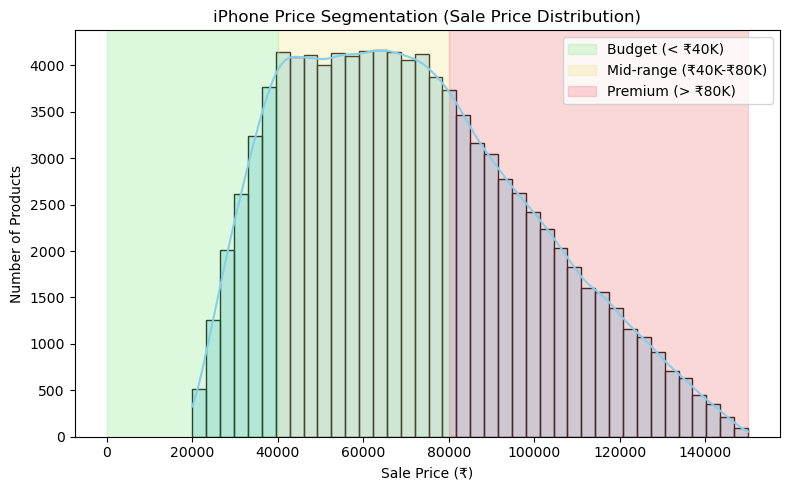

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert column to numeric
df["Sale Price"] = pd.to_numeric(df["Sale Price"], errors="coerce")

plt.figure(figsize=(8,5))
sns.histplot(df["Sale Price"], bins=40, kde=True, color="skyblue")

plt.title("iPhone Price Segmentation (Sale Price Distribution)")
plt.xlabel("Sale Price (₹)")
plt.ylabel("Number of Products")

# --- Highlight price bands ---
plt.axvspan(0, 40000, color="lightgreen", alpha=0.3, label="Budget (< ₹40K)")
plt.axvspan(40000, 80000, color="khaki", alpha=0.3, label="Mid-range (₹40K-₹80K)")
plt.axvspan(80000, df["Sale Price"].max(), color="lightcoral", alpha=0.3, label="Premium (> ₹80K)")
plt.legend()

plt.tight_layout()
plt.show()

## **Average Sale Price by Product Name (Top 10 iPhones)**

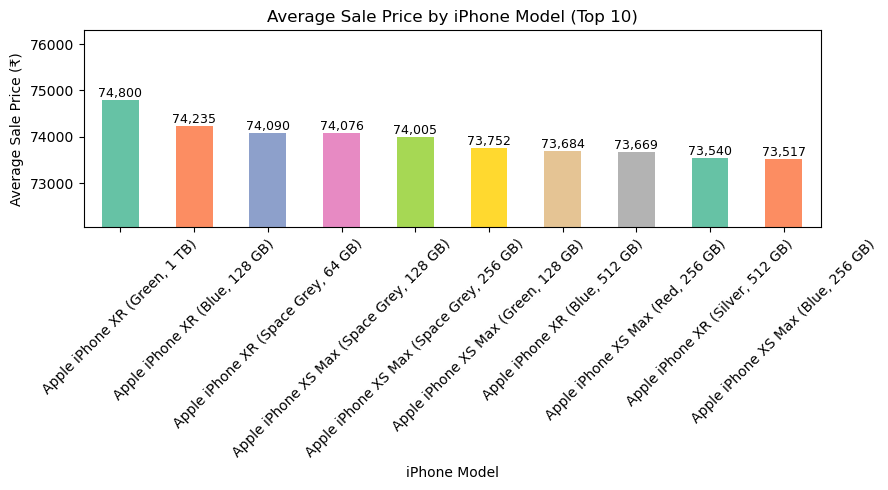

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure numeric
df["Sale Price"] = pd.to_numeric(df["Sale Price"], errors="coerce")

# Extract clean model names (optional cleaning)
df["Product Name Clean"] = df["Product Name"].str.extract(r"(iPhone\s*\d+\s*[A-Za-z]*)", expand=False)
df["Product Name Clean"] = df["Product Name Clean"].fillna(df["Product Name"])

# Compute average sale price per model
avg_price_model = (
    df.groupby("Product Name Clean")["Sale Price"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .round(2)
)

# Plot
plt.figure(figsize=(9,5))
colors = sns.color_palette("Set2", len(avg_price_model))
ax = avg_price_model.plot(kind="bar", color=colors)

plt.title("Average Sale Price by iPhone Model (Top 10)")
plt.xlabel("iPhone Model")
plt.ylabel("Average Sale Price (₹)")
plt.xticks(rotation=45)
plt.ylim(avg_price_model.min()*0.98, avg_price_model.max()*1.02)

# Add value labels
for i, v in enumerate(avg_price_model):
    plt.text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

## **Average Sale Price by RAM**

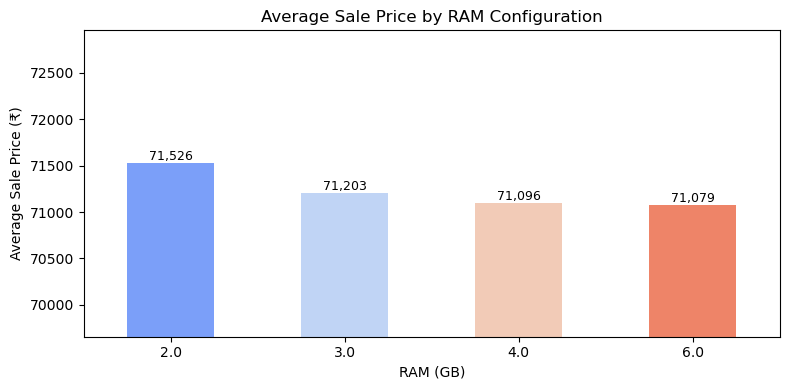

In [12]:
# Ensure numeric conversion
df["Sale Price"] = pd.to_numeric(df["Sale Price"], errors="coerce")

# Clean 'Ram' values (remove text like 'GB', convert to numeric)
df["Ram Clean"] = (
    df["Ram"]
    .astype(str)
    .str.extract(r"(\d+)", expand=False)
    .astype(float)
)

# Compute average price per RAM size
avg_price_ram = (
    df.groupby("Ram Clean")["Sale Price"]
      .mean()
      .sort_index()
      .round(0)
)

# Plot
plt.figure(figsize=(8,4))
colors = sns.color_palette("coolwarm", len(avg_price_ram))
ax = avg_price_ram.plot(kind="bar", color=colors)

plt.title("Average Sale Price by RAM Configuration")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Sale Price (₹)")
plt.xticks(rotation=0)
plt.ylim(avg_price_ram.min()*0.98, avg_price_ram.max()*1.02)

# Add value labels
for i, v in enumerate(avg_price_ram):
    plt.text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

## **Top 10 iPhones by Average Star Rating**

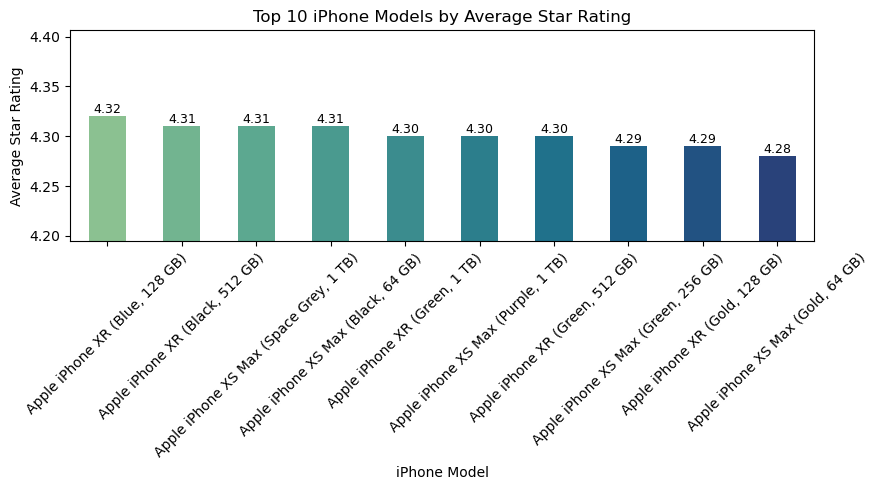

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure numeric type
df["Star Rating"] = pd.to_numeric(df["Star Rating"], errors="coerce")

# Extract clean product names (remove long text)
df["Product Name Clean"] = df["Product Name"].str.extract(r"(iPhone\s*\d+\s*[A-Za-z]*)", expand=False)
df["Product Name Clean"] = df["Product Name Clean"].fillna(df["Product Name"])

# Compute average star rating per model
avg_rating_model = (
    df.groupby("Product Name Clean")["Star Rating"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .round(2)
)

# Plot
plt.figure(figsize=(9,5))
colors = sns.color_palette("crest", len(avg_rating_model))
ax = avg_rating_model.plot(kind="bar", color=colors)

plt.title("Top 10 iPhone Models by Average Star Rating")
plt.xlabel("iPhone Model")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(avg_rating_model.min()*0.98, avg_rating_model.max()*1.02)

# Add value labels
for i, v in enumerate(avg_rating_model):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

## **Top 10 iPhones with Highest Discount Percentage**

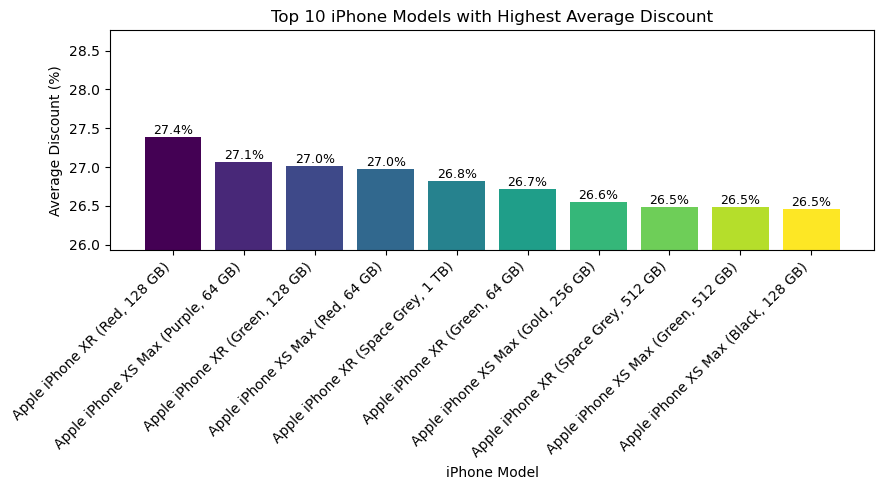

In [20]:
# Ensure numeric
df["Discount Percentage"] = pd.to_numeric(df["Discount Percentage"], errors="coerce")
df["Sale Price"] = pd.to_numeric(df["Sale Price"], errors="coerce")

# Clean model namesa
df["Product Name Clean"] = df["Product Name"].str.extract(r"(iPhone\s*\d+\s*[A-Za-z]*)", expand=False)
df["Product Name Clean"] = df["Product Name Clean"].fillna(df["Product Name"])

# Calculate top-10 by average discount
top_discount = (
    df.groupby("Product Name Clean", as_index=False)[["Discount Percentage","Sale Price"]]
      .mean()
      .sort_values("Discount Percentage", ascending=False)
      .head(10)
      .round(2)
)

# Custom Matplotlib color map (warning-free)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_discount)))

plt.figure(figsize=(9,5))
bars = plt.bar(top_discount["Product Name Clean"], top_discount["Discount Percentage"], color=colors)

plt.title("Top 10 iPhone Models with Highest Average Discount")
plt.xlabel("iPhone Model")
plt.ylabel("Average Discount (%)")
plt.xticks(rotation=45, ha="right")

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.1f}%", ha="center", va="bottom", fontsize=9)

# Slight y-axis zoom for readability
ymin = top_discount["Discount Percentage"].min() * 0.98
ymax = top_discount["Discount Percentage"].max() * 1.05
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.show()

## **Top iphone models by Popularity**

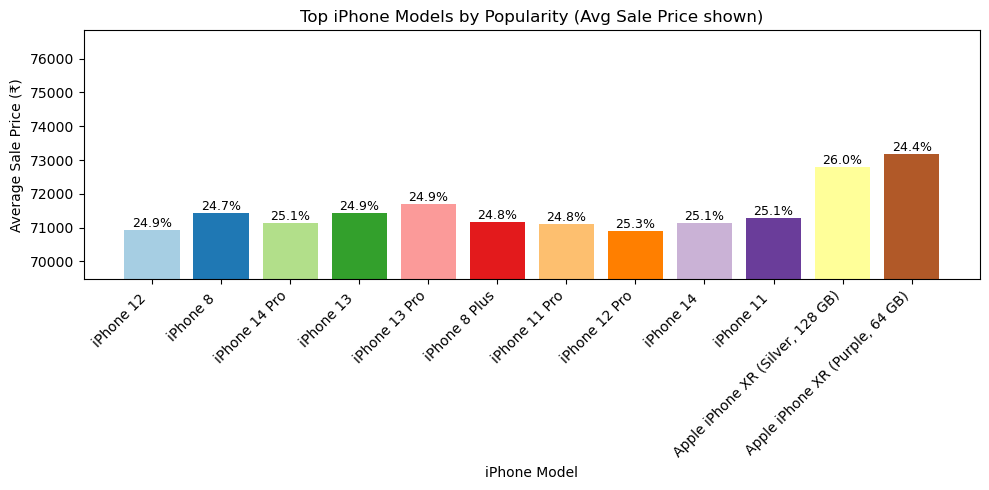

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure numeric
df["Sale Price"] = pd.to_numeric(df["Sale Price"], errors="coerce")
df["Discount Percentage"] = pd.to_numeric(df["Discount Percentage"], errors="coerce")
df["Number Of Ratings"] = pd.to_numeric(df["Number Of Ratings"], errors="coerce")

# Clean product names for shorter labels
df["Product Name Clean"] = df["Product Name"].str.extract(r"(iPhone\s*\d+\s*[A-Za-z]*)", expand=False)
df["Product Name Clean"] = df["Product Name Clean"].fillna(df["Product Name"])

# Aggregate by model
agg = (df.groupby("Product Name Clean", as_index=False)
         .agg(avg_price=("Sale Price","mean"),
              avg_disc=("Discount Percentage","mean"),
              total_ratings=("Number Of Ratings","sum")))

# Pick top 12 by popularity
top = (agg.sort_values("total_ratings", ascending=False)
          .head(12)
          .round({"avg_price":0, "avg_disc":1}))

# --- Plot ---
plt.figure(figsize=(10,5))
colors = plt.cm.Paired(np.linspace(0, 1, len(top)))
bars = plt.bar(top["Product Name Clean"], top["avg_price"], color=colors)

plt.title("Top iPhone Models by Popularity (Avg Sale Price shown)")
plt.xlabel("iPhone Model")
plt.ylabel("Average Sale Price (₹)")
plt.xticks(rotation=45, ha="right")

# Value labels showing discount %
for bar, disc in zip(bars, top["avg_disc"]):
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{disc:.1f}%", 
             ha="center", va="bottom", fontsize=9)

# Slight zoom for clarity
plt.ylim(top["avg_price"].min()*0.98, top["avg_price"].max()*1.05)
plt.tight_layout()
plt.show()

## **Top 10 iPhones by Price Gap (MRP − Sale Price)**

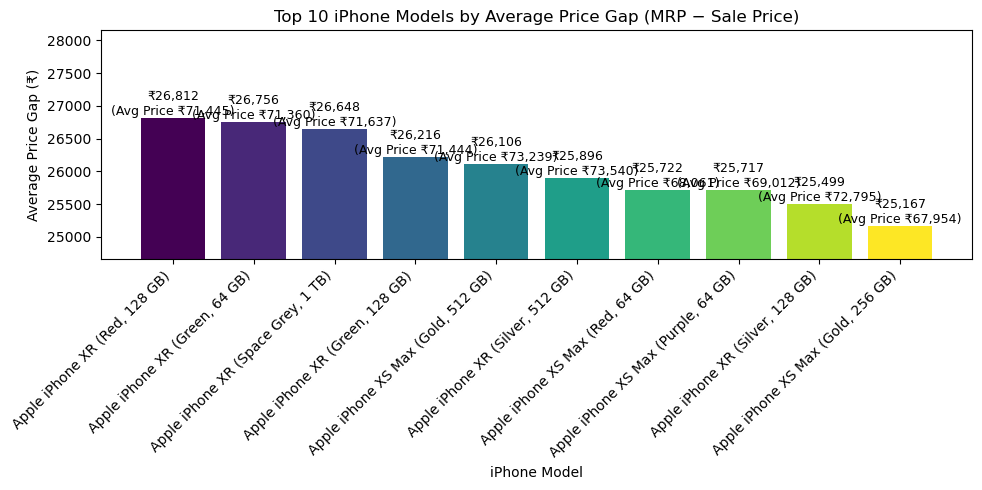

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure numeric
df["Sale Price"] = pd.to_numeric(df["Sale Price"], errors="coerce")
df["MRP"] = pd.to_numeric(df["MRP"], errors="coerce")

# Clean product names for readable labels
df["Product Name Clean"] = df["Product Name"].str.extract(r"(iPhone\s*\d+\s*[A-Za-z]*)", expand=False)
df["Product Name Clean"] = df["Product Name Clean"].fillna(df["Product Name"])

# Compute price gap per row and aggregate by model
df["Price Gap"] = (df["MRP"] - df["Sale Price"]).clip(lower=0)

gap_top = (df.groupby("Product Name Clean", as_index=False)
             .agg(avg_gap=("Price Gap","mean"),
                  avg_price=("Sale Price","mean"))
             .sort_values("avg_gap", ascending=False)
             .head(10)
             .round({"avg_gap":0, "avg_price":0}))

# Plot
plt.figure(figsize=(10,5))
colors = plt.cm.viridis(np.linspace(0, 1, len(gap_top)))
bars = plt.bar(gap_top["Product Name Clean"], gap_top["avg_gap"], color=colors)

plt.title("Top 10 iPhone Models by Average Price Gap (MRP − Sale Price)")
plt.xlabel("iPhone Model")
plt.ylabel("Average Price Gap (₹)")
plt.xticks(rotation=45, ha="right")

# Value labels (also show avg sale price for context)
for bar, price in zip(bars, gap_top["avg_price"]):
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"₹{h:,.0f}\n(Avg Price ₹{price:,.0f})",
             ha="center", va="bottom", fontsize=9)

# Slight y-axis zoom
plt.ylim(gap_top["avg_gap"].min()*0.98, gap_top["avg_gap"].max()*1.05)
plt.tight_layout()
plt.show()

## **MRP vs Sale Price — Top 10 Popular Models**

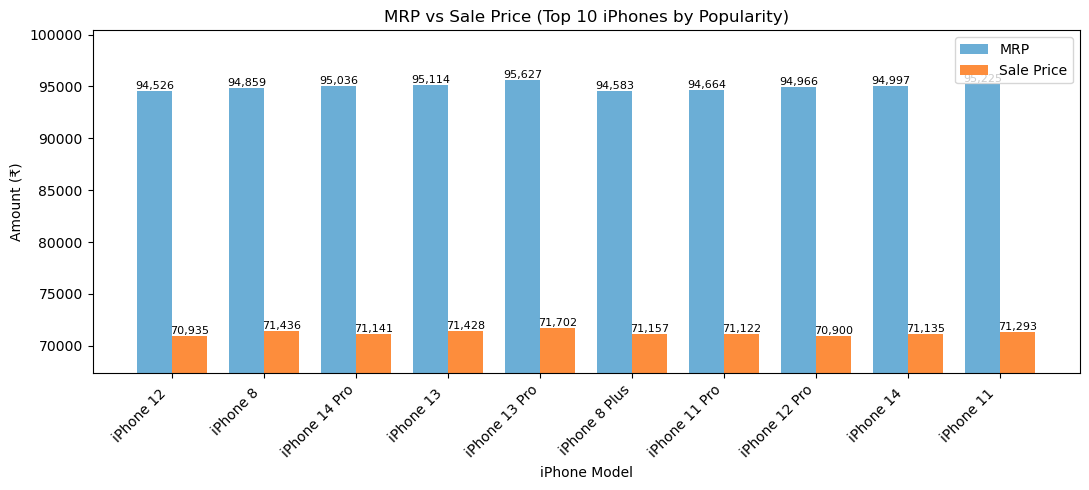

In [26]:
# Top 10 by popularity (total ratings)
pop = (df.groupby("Product Name Clean", as_index=False)
         .agg(total_ratings=("Number Of Ratings","sum"),
              avg_price=("Sale Price","mean"),
              avg_mrp=("MRP","mean")))
top = pop.sort_values("total_ratings", ascending=False).head(10).round(0)

x = np.arange(len(top))
w = 0.38

plt.figure(figsize=(11,5))
plt.bar(x - w/2, top["avg_mrp"], width=w, label="MRP", color="#6baed6")
plt.bar(x + w/2, top["avg_price"], width=w, label="Sale Price", color="#fd8d3c")

plt.title("MRP vs Sale Price (Top 10 iPhones by Popularity)")
plt.xlabel("iPhone Model"); plt.ylabel("Amount (₹)")
plt.xticks(x, top["Product Name Clean"], rotation=45, ha="right")
for i,(mrp,sp) in enumerate(zip(top["avg_mrp"], top["avg_price"])):
    plt.text(i - w/2, mrp, f"{mrp:,.0f}", ha="center", va="bottom", fontsize=8)
    plt.text(i + w/2, sp,  f"{sp:,.0f}", ha="center", va="bottom", fontsize=8)
plt.ylim(min(top["avg_price"].min(), top["avg_mrp"].min())*0.95,
         max(top["avg_price"].max(), top["avg_mrp"].max())*1.05)
plt.legend(); plt.tight_layout(); plt.show()

## **Correlation Heatmap (Pricing, Ratings, Reviews)**

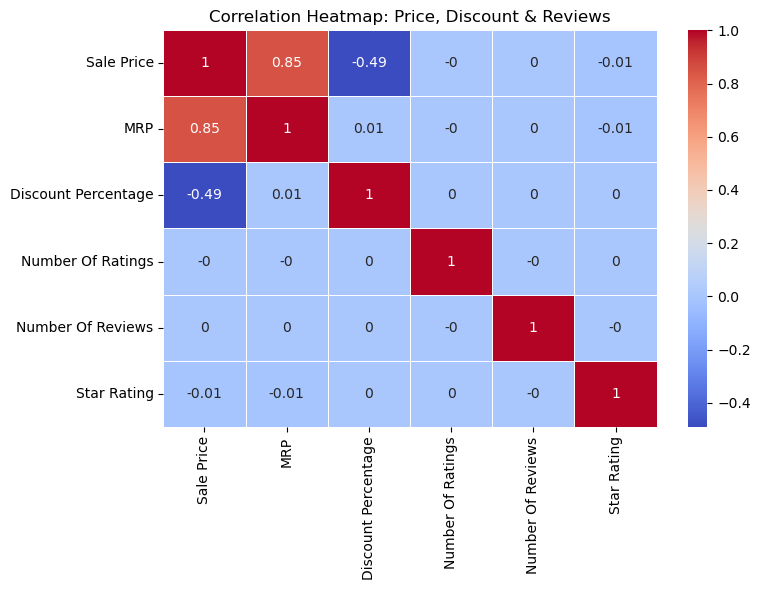

In [28]:
num = df[["Sale Price","MRP","Discount Percentage","Number Of Ratings","Number Of Reviews","Star Rating"]]
corr = num.corr().round(2)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Price, Discount & Reviews")
plt.tight_layout(); plt.show()

## **Average Discount by Price Segment (Budget / Mid / Premium)**

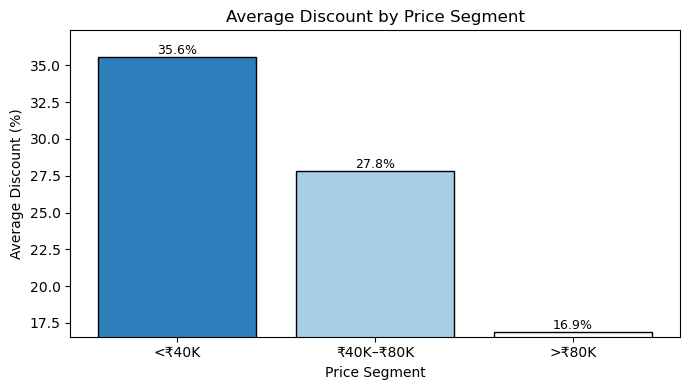

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Price-band definitions (if not already in your notebook)
bins = [0, 40000, 80000, np.inf]
labels = ["<₹40K","₹40K–₹80K",">₹80K"]
df["Price Band"] = pd.cut(df["Sale Price"], bins=bins, labels=labels, right=False)

# Compute average discount per band
disc_band = df.groupby("Price Band", observed=False)["Discount Percentage"].mean().round(1)

# Use a darker, high-contrast color palette (e.g., Blues_r)
colors = plt.cm.Blues_r(np.linspace(0.3, 1, len(disc_band)))  # start from medium blue, avoid very light tones

plt.figure(figsize=(7,4))
bars = plt.bar(disc_band.index.astype(str), disc_band.values, color=colors, edgecolor="black")

plt.title("Average Discount by Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Average Discount (%)")
plt.xticks(rotation=0)

# Add value labels
for bar, val in zip(bars, disc_band.values):
    plt.text(bar.get_x() + bar.get_width()/2, val, f"{val:.1f}%", 
             ha="center", va="bottom", fontsize=9)

# Slight y-axis zoom
plt.ylim(disc_band.min()*0.98, disc_band.max()*1.05)
plt.tight_layout()
plt.show()

## **Popularity by Price Segment**

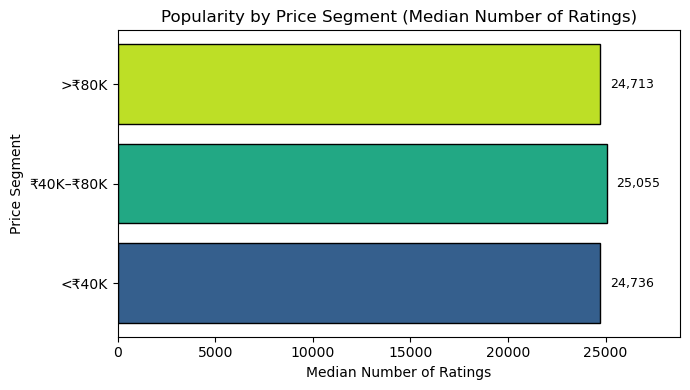

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure numeric columns
df["Sale Price"] = pd.to_numeric(df["Sale Price"], errors="coerce")
df["Number Of Ratings"] = pd.to_numeric(df["Number Of Ratings"], errors="coerce")

# Define price segments
bins = [0, 40000, 80000, np.inf]
labels = ["<₹40K", "₹40K–₹80K", ">₹80K"]
df["Price Band"] = pd.cut(df["Sale Price"], bins=bins, labels=labels, right=False)

# Median popularity (to reduce effect of outliers)
pop_by_band = (df.groupby("Price Band", observed=False)["Number Of Ratings"]
                 .median()
                 .round(0))

# Horizontal bar chart
plt.figure(figsize=(7,4))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(pop_by_band)))
bars = plt.barh(pop_by_band.index.astype(str), pop_by_band.values, 
                color=colors, edgecolor="black")

plt.title("Popularity by Price Segment (Median Number of Ratings)")
plt.xlabel("Median Number of Ratings")
plt.ylabel("Price Segment")

# Value labels at end of bars
for bar, val in zip(bars, pop_by_band.values):
    plt.text(val + (pop_by_band.max() * 0.02), 
             bar.get_y() + bar.get_height()/2, 
             f"{int(val):,}", va="center", fontsize=9)

# Adjust axis range for label spacing
plt.xlim(0, pop_by_band.max() * 1.15)
plt.tight_layout()
plt.show()

## **Top 12 by Number Of Reviews (labels show Avg Discount %)**

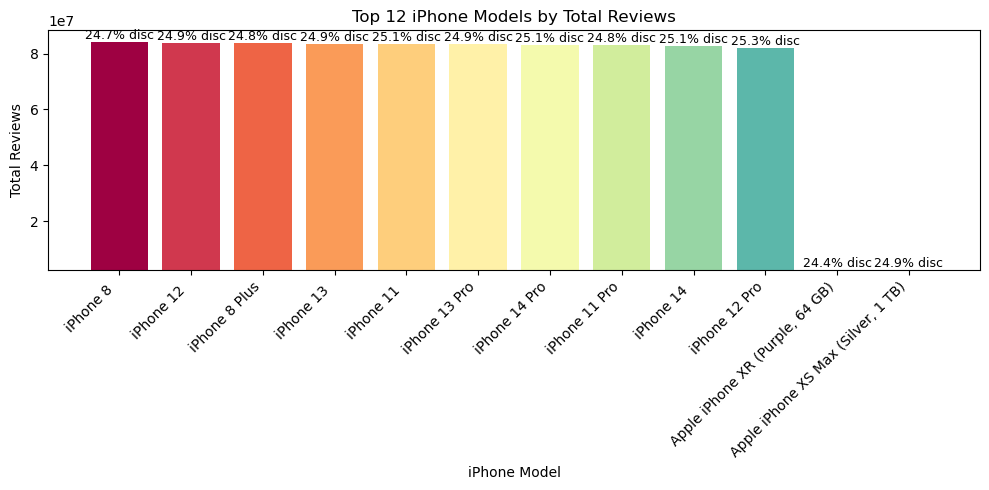

In [35]:
top_reviews = (df.groupby("Product Name Clean", as_index=False)
                 .agg(total_reviews=("Number Of Reviews","sum"),
                      avg_disc=("Discount Percentage","mean"),
                      avg_price=("Sale Price","mean"))
                 .sort_values("total_reviews", ascending=False)
                 .head(12)
                 .round({"avg_disc":1, "avg_price":0}))

plt.figure(figsize=(10,5))
colors = plt.cm.Spectral(np.linspace(0,1,len(top_reviews)))
bars = plt.bar(top_reviews["Product Name Clean"], top_reviews["total_reviews"], color=colors)

plt.title("Top 12 iPhone Models by Total Reviews")
plt.xlabel("iPhone Model"); plt.ylabel("Total Reviews")
plt.xticks(rotation=45, ha="right")
for bar, d in zip(bars, top_reviews["avg_disc"]):
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{d:.1f}% disc", ha="center", va="bottom", fontsize=9)
plt.ylim(top_reviews["total_reviews"].min()*0.98, top_reviews["total_reviews"].max()*1.05)
plt.tight_layout(); plt.show()

## **Average Star Rating by Price Segment**

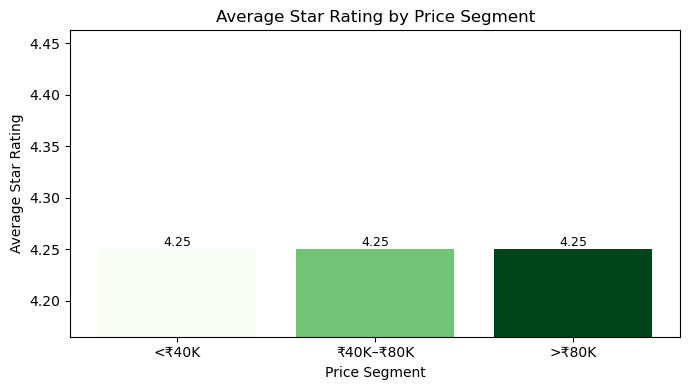

In [36]:
rating_band = (df.groupby("Price Band", observed=False)["Star Rating"]
                 .mean().round(2))

plt.figure(figsize=(7,4))
colors = plt.cm.Greens(np.linspace(0,1,len(rating_band)))
bars = plt.bar(rating_band.index.astype(str), rating_band.values, color=colors)

plt.title("Average Star Rating by Price Segment")
plt.xlabel("Price Segment"); plt.ylabel("Average Star Rating")
for bar,val in zip(bars, rating_band.values):
    plt.text(bar.get_x()+bar.get_width()/2, val, f"{val:.2f}", ha="center", va="bottom", fontsize=9)
plt.ylim(rating_band.min()*0.98, rating_band.max()*1.05)
plt.tight_layout(); plt.show()

## **Mini KPI Dashboard**

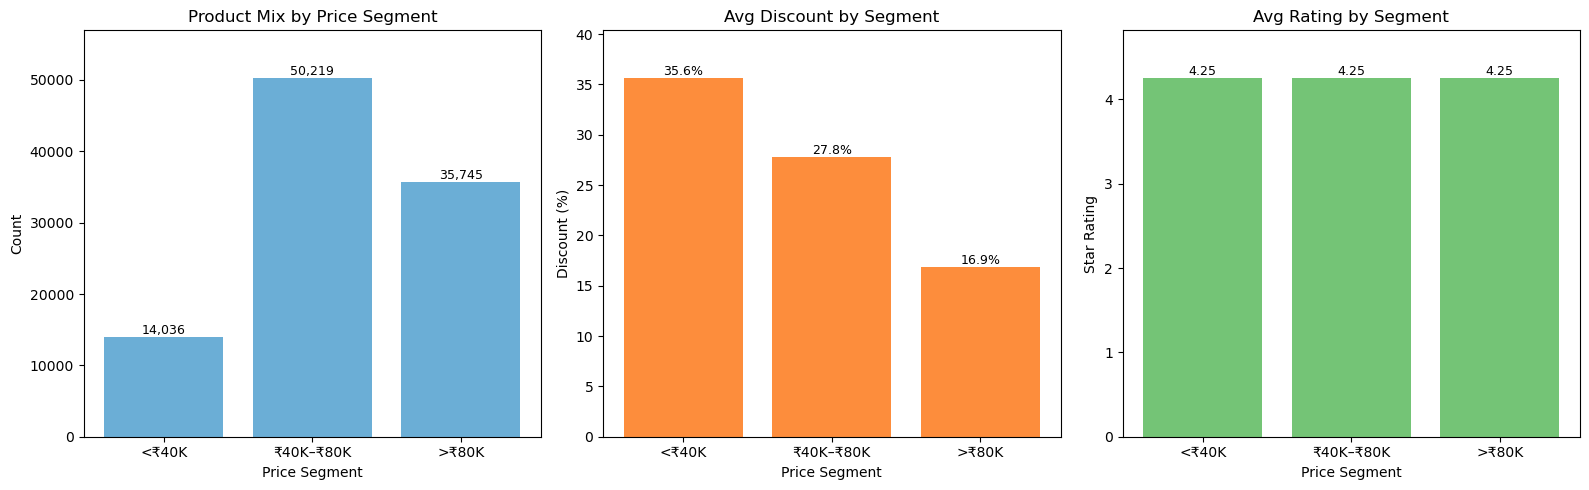

In [37]:
import seaborn as sns
fig, axes = plt.subplots(1,3, figsize=(16,5))

# A) Price band mix (counts)
band_counts = df["Price Band"].value_counts(dropna=False).sort_index()
axes[0].bar(band_counts.index.astype(str), band_counts.values, color="#6baed6")
axes[0].set_title("Product Mix by Price Segment"); axes[0].set_xlabel("Price Segment"); axes[0].set_ylabel("Count")
for i,v in enumerate(band_counts.values): axes[0].text(i, v, f"{v:,}", ha="center", va="bottom", fontsize=9)

# B) Avg discount by band
axes[1].bar(disc_band.index.astype(str), disc_band.values, color="#fd8d3c")
axes[1].set_title("Avg Discount by Segment"); axes[1].set_xlabel("Price Segment"); axes[1].set_ylabel("Discount (%)")
for i,v in enumerate(disc_band.values): axes[1].text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

# C) Avg rating by band
axes[2].bar(rating_band.index.astype(str), rating_band.values, color="#74c476")
axes[2].set_title("Avg Rating by Segment"); axes[2].set_xlabel("Price Segment"); axes[2].set_ylabel("Star Rating")
for i,v in enumerate(rating_band.values): axes[2].text(i, v, f"{v:.2f}", ha="center", va="bottom", fontsize=9)

for ax in axes: ax.set_ylim(0, ax.get_ylim()[1]*1.08)
plt.tight_layout(); plt.show()